In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

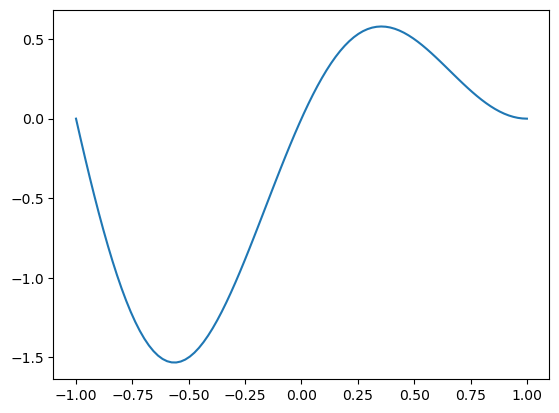

In [2]:
def func(x):
    return np.sin(np.pi * x) * (1 - x)

xs = np.linspace(-1, 1, 100)
ys = func(xs)
plt.plot(xs, ys)
plt.show()

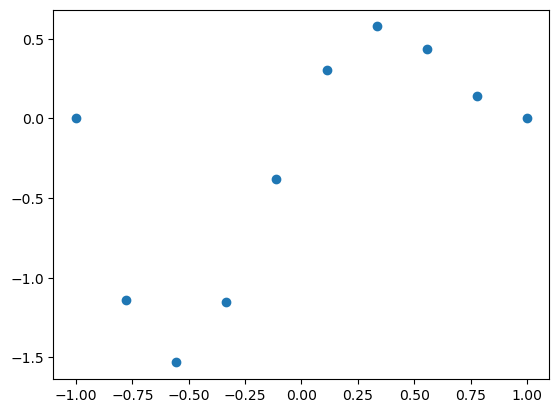

In [3]:
sample_x = np.linspace(-1, 1, 10)
sample_y = func(sample_x)
plt.scatter(sample_x, sample_y)
plt.show()

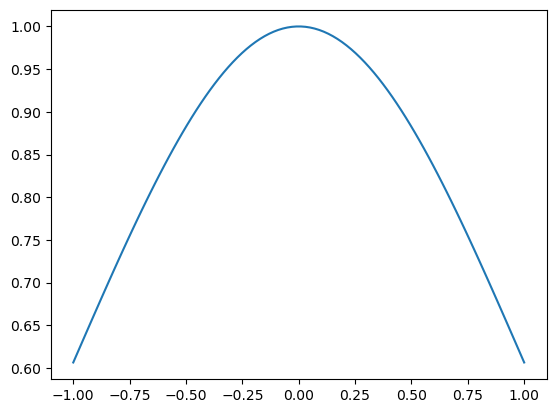

In [4]:
def kernel_func(x_ref, x_input, sigma=1):
    return np.exp(-(x_input-x_ref)**2 / (2 * sigma**2))

xs = np.linspace(-1, 1, 100)
ys = kernel_func(0, xs)
plt.plot(xs, ys)
plt.show()

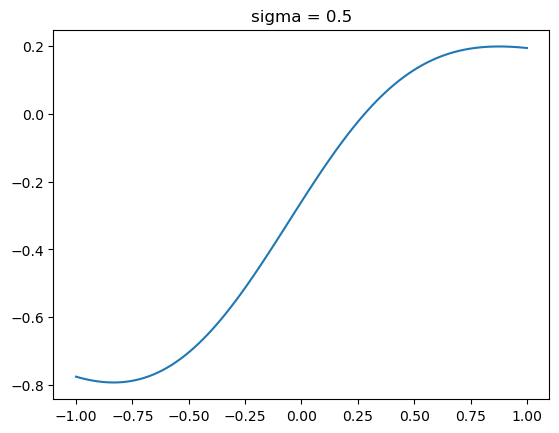

In [6]:
def kernel_regression(xs, ys, x_input, sigma=1):
    # xs: [n, ]
    # ys: [n, ]
    # x_input: [m, ]
    N = xs.shape[0]
    xs = np.expand_dims(xs, 1)
    ys = np.expand_dims(ys, 1)
    x_input = np.expand_dims(x_input, 0)
    x_input = np.repeat(x_input, N, 0)
    weight = kernel_func(xs, x_input, sigma) # [n, m]
    weight_sum = np.sum(weight, 0)
    weight_dot = weight.T @ ys
    weight_dot = np.squeeze(weight_dot, 1)
    res = weight_dot / weight_sum
    return res

sigma = 0.5
xs = np.linspace(-1, 1, 100)
ys = kernel_regression(sample_x, sample_y, xs, sigma)
plt.title(f'sigma = {sigma}')
plt.plot(xs, ys)
plt.show()